# Introdução a Análise de Sentimento com Bluesky! 🍓🦋
## Utilizando Machine Learning para Monitorar o Comportamento Emocional nas Redes Sociais

Nos últimos anos, a análise de sentimentos tornou-se uma ferramenta fundamental para compreender as interações de usuários em plataformas digitais. Com a crescente ascençao de redes sociais, como o Bluesky, é possível obter insights valiosos sobre o comportamento dos usuários através da análise de suas postagens. O objetivo deste trabalho é aplicar técnicas de Machine Learning para realizar a análise de sentimentos em postagens de usuários da plataforma Bluesky, utilizando bibliotecas como Pandas e Scikit-Learn.

O foco principal do projeto é classificar as postagens em sentimentos positivos, neutros e negativos. Com base nessa classificação, será possível atribuir uma nota ao comportamento do usuário ao longo do tempo, permitindo que ele monitore seu estado emocional. Ao identificar tendências depressivas ou negativas em suas postagens, um sistema da rede poderia emitir alertas, visando estimular a auto-reflexão e o autocuidado.

Para atingir esse objetivo, o trabalho será dividido em diversas etapas, desde a coleta e pré-processamento dos dados, até a construção de modelos de classificação de sentimentos. O uso das bibliotecas Pandas facilitará a manipulação e limpeza dos dados, enquanto o Scikit-Learn fornecerá as ferramentas necessárias para a construção dos modelos de aprendizado de máquina. Ao final, espera-se oferecer uma solução eficiente para monitoramento do comportamento emocional dos usuários na plataforma Bluesky, promovendo um ambiente digital mais saudável e equilibrado.

Embora esta seja uma proposta teórica, sua aplicação prática pode ser verificada por cientistas de dados que desejem rodar o código base, visualizando o resultado da análise e dos modelos de aprendizado. Para o treinamento do algoritmo de Machine Learning, estamos utilizando o famoso [Brazilian E-Commerce Public Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), um conjunto de dados que oferece uma base sólida para treinar modelos de classificação de sentimentos em textos.

In [1]:
# Essa célula de código importa o módulo warnings passa a ignorar possiveis avisos provenientes das bibliotecas no Python.
# Realizamos essa importação para que não tenhamos atenção tomada para avisos que não influenciam na execução do código.

import warnings
warnings.filterwarnings("ignore")

# Numpy & Pandas: A dupla (realmente) dinâmica

*`NumPy`* e *`Pandas`* são bibliotecas essenciais no ecossistema Python para ciência de dados e computação numérica. O NumPy fornece suporte para arrays e matrizes multidimensionais, além de funções matemáticas de alto desempenho para operar nesses dados. O Pandas, construído sobre o NumPy, oferece estruturas de dados como Series e DataFrames, que facilitam a manipulação e análise de dados tabulares de forma eficiente.

No nosso projeto, utilizaremos ambas as bibliotecas ou partes delas. No entanto, daremos ênfase maior ao uso do Pandas, pois ele nos permite trabalhar de maneira mais eficaz com conjuntos de dados complexos, realizando tarefas de limpeza, transformação e análise exploratória. Embora o NumPy seja menos utilizado diretamente, praticamente todas as bibliotecas voltadas para dados têm um "dedo" do NumPy, devido à sua eficiência e velocidade em operações numéricas.

In [2]:
import pandas as pd
import numpy as np

# Matplotlib & Seaborn: É melhor que PowerBI mas ainda não perceberam isso

*`Seaborn`* e *`matplotlib.pyplot`* são bibliotecas em Python utilizadas para criar visualizações gráficas de dados. O matplotlib.pyplot oferece funções básicas para plotagem de gráficos, como linhas, barras e dispersão. Já o Seaborn é construído sobre o Matplotlib e fornece uma interface mais amigável para gerar gráficos estatísticos atraentes e informativos.

Embora tenhamos importado essas bibliotecas para o nosso projeto, não realizaremos análises gráficas devido à falta de tempo. No entanto, é importante conhecer essas ferramentas, pois elas são essenciais para visualizar dados e identificar padrões ou tendências.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: A biblioteca mais simples de utilizar
### Dizem que você pode criar redes neurais com quatro linhas e que você programa pior por causa disso

*`Scikit-learn`* é uma biblioteca em Python que fornece ferramentas para a construção de modelos de aprendizado de máquina, classificação, regressão e outras tarefas de machine learning. Ele possui uma API simples e intuitiva, facilitando a integração com outros frameworks e bibliotecas.

No nosso projeto, utilizaremos o Scikit-learn para classificar as postagens de usuários de acordo com os sentimentos positivos, neutros e negativos, bem como para treinar um modelo de aprendizado de máquina para realizar a análise de sentimentos.

_____________________________________________________________________________

### Divisão de Dados e Pipelines
* `from sklearn.model_selection import train_test_split`</br>
Função para dividir o conjunto de dados em conjuntos de treinamento e teste.

* `from sklearn.pipeline import Pipeline`</br>
Classe que permite a criação de uma sequência de transformações e um estimador final em um único objeto.

____________________________________________________________________________

### Extração de Características de Texto
* `from sklearn.feature_extraction.text import CountVectorizer`</br>
Converte uma coleção de documentos de texto em uma matriz de contagem de tokens (bag-of-words).

* `from sklearn.feature_extraction.text import TfidfVectorizer`</br>
Transforma textos em uma representação numérica baseada no TF-IDF (Term Frequency-Inverse Document Frequency).

____________________________________________________________________________

### Modelos de Aprendizado de Máquina

* `from sklearn.linear_model import LogisticRegression`</br>
Implementação do modelo de Regressão Logística para tarefas de classificação.

* `from sklearn.naive_bayes import MultinomialNB`</br>
Classificador Naive Bayes Multinomial, frequentemente usado em dados discretos como contagens de palavras

____________________________________________________________________________

### Métricas de Avaliação

* `from sklearn.metrics import accuracy_score`</br>
Calcula a acurácia da classificação.

* `from sklearn.metrics import confusion_matrix`</br>
Gera a matriz de confusão para avaliar a qualidade das previsões.

* `from sklearn.metrics import f1_score`</br>
Calcula o F1-Score, a média harmônica da precisão e recall.

* `from sklearn.metrics import roc_auc_score`</br>
Calcula a área sob a curva ROC, utilizada para avaliar modelos de classificação binária.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

# Um resumo sobre o NLTK

O **NLTK (Natural Language Toolkit)** é uma biblioteca em Python destinada ao **Processamento de Linguagem Natural (PLN)** (Ou NLP se você manjar do Engrish). Ela oferece um conjunto abrangente de ferramentas e recursos para trabalhar com dados textuais. Com o NLTK, é possível realizar diversas tarefas, como:

* **Tokenização**: Dividir texto em unidades linguísticas, como palavras ou frases.
* **Stemming e Lematização**: Reduzir palavras às suas raízes ou formas canônicas.
* **Remoção de Stopwords**: Eliminar palavras comuns que podem não agregar significado significativo à análise.
* **Análise Sintática**: Entender a estrutura gramatical das sentenças.
* **Extração de Entidades Nomeadas**: Identificar e classificar elementos importantes no texto, como nomes de pessoas, lugares ou organizações.

O NLTK é amplamente utilizado em projetos de **mineração de texto, chatbots, análise de sentimentos** e outras aplicações que envolvem a compreensão e manipulação de linguagem humana. Ele facilita o desenvolvimento de soluções complexas de PLN, fornecendo módulos prontos e datasets para experimentação e pesquisa.

_____________________________________________________________________________

# NLTK em nosso contexto
* `from nltk.corpus import stopwords`</br>
Importa uma lista de stopwords, que são palavras comuns em um idioma (como "e", "de", "o") que geralmente são removidas durante o pré-processamento de texto para melhorar a análise, já que adicionam pouco valor semântico.

* `from nltk.tokenize import word_tokenize`</br>
Importa a função de tokenização de palavras, que divide um texto em palavras individuais ou tokens. Essa etapa é fundamental para preparar os dados textuais para tarefas de processamento de linguagem natural.

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
# Certifique-se de que as stopwords estão baixadas
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# AT Proto: Redes sociais descentralizadas? Quanto tempo até os malucos começarem a criar as redes deles?

O AT Protocol (Authenticated Transfer Protocol) é uma nova estrutura descentralizada para redes sociais, desenvolvida para promover a interoperabilidade entre diferentes plataformas, permitindo que usuários tenham controle sobre seus dados e identidades digitais. O **Bluesky** é uma plataforma de mídia social que utiliza o *AT Protocol* para oferecer uma experiência de rede descentralizada e mais aberta.

No contexto da nossa aplicação, fazemos uso do AT Protocol em conjunto com o *Bluesky* para nos conectar à API do *Bluesky* e obter os últimos cem posts de um determinado perfil de usuário. Isso nos permite extrair e analisar conteúdos de usuários específicos, aproveitando a flexibilidade e a segurança proporcionadas pela arquitetura descentralizada do AT Protocol.

In [7]:
from atproto import Client

# Código Limpo: É código legível OU código que segue padrões de um livro? Sei lá

Obrigado pela leitura! Adorei nosso papo, mas agora vou permitir que o código fale por si mesmo. Abaixo, você encontrará o código seguido de pequenos comentários.

In [8]:
# Realizamos a leitura dos dados CSV e transformamos em DataFrame com Pandas; Trabalharemos com o Dataset "Olist" nesse projeto
df = pd.read_csv('./olist_order_reviews_dataset.csv')

# Exibimos o a quantidade de linhas e colunas em nosso DataFrame
df.shape

(99224, 7)

In [9]:
print(f'Número de reviews: {len(df)}')
print(f'Registros únicos de reviews: {df["review_id"].nunique()}')

Número de reviews: 99224
Registros únicos de reviews: 98410


In [10]:
# Qual a quantidade de registro nulos por feature?
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
# Registro com comentário nulo obviamente não nos serve, então descartamos:
df = df.dropna(subset=['review_comment_message'])

In [12]:
# E também foi detectado registro com id duplicado, portanto, vamos descartar o lixo:
df.drop_duplicates(subset='review_id', inplace=True)

In [13]:
# Para fazer o processo de steaming nós optamos por trabalhar com todas palavras em minúsculo
df['review_comment_message'] = df['review_comment_message'].map(lambda x: x.lower())

In [14]:
# Como também nosso foco é análise de sentimento, tanto faz as colunas order_id, review_creation_date e review_answer_timestamp
df.drop(columns=['order_id', 'review_creation_date', 'review_answer_timestamp'], inplace=True)

In [15]:
# Preenche os vazios para não ter problemas de concatenação futura
df['review_comment_title'].fillna('', inplace=True)

# Para melhorar nosso target a gente vai criar uma nova feature que é a junção do título com os comentários
df['review'] = df['review_comment_title'] + ' ' + df['review_comment_message']

# Filtra os reviews que não possuem texto, já que não temos como fazer o processamento de texto com um texto vazio.
df = df[(df['review'] != ' ') & (df['review'] != '') & (df['review'] != np.nan)]

In [16]:
# Então basicamente temos essa feature chamada review_score que é nada mais nada menos que a classificação da avaliação, se ela é positiva, ou negativa.
# Está por estrela, mas se for maior que três estrelas a gente considera positiva e se for menos que isso é negativa.
# Então basicamente temos como resultado as labels.

labels = []

for score in df['review_score']:
  if score > 3.5:
    labels.append(1)
  else:
    labels.append(0)

df['label'] = labels

In [17]:
# Obtém as stopwords em português do módulo NLTK
stop_words = stopwords.words("portuguese")

# Remoção das stopwords "não" e "nem" pois elas modificam drasticamente o sentido de uma frase, portanto, para melhor performance optamos por remove-las.
stop_words.remove('não')
stop_words.remove('nem')

In [18]:
import re

# Função para limpar o texto
def clean_text(text):
    text = re.sub(r"[\W\d_]+", " ", text)
    tokens = word_tokenize(text)
    cleaned_text = ' '.join([word for word in tokens if word not in set(stop_words)])
    return cleaned_text

In [19]:
# Usamos a função que limpa o texto em nossa coluna de review
df['review'] = df['review'].apply(clean_text)

In [20]:
vectorizer = CountVectorizer(binary=True, max_features=5000)

In [21]:
X = vectorizer.fit_transform(df['review'])

In [22]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, df['label'], test_size=0.3, random_state=42)

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
def show_metrics(y_true, y_pred):
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("AUROC:", roc_auc_score(y_true, y_pred))
  print("F1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("Matriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

Acurácia:  0.8914843045651996
AUROC: 0.8760068711740491
F1-Score: 0.8909383497681884
Matriz de confusão:


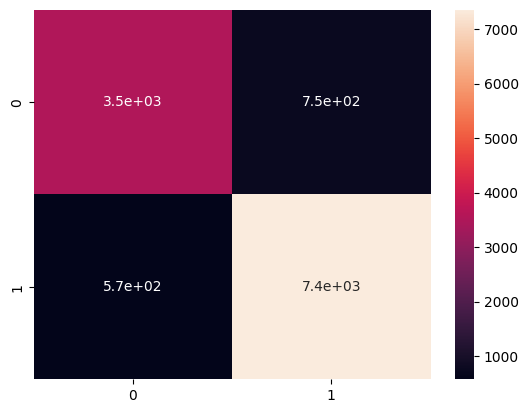

In [26]:
show_metrics(y_test, y_pred)

In [27]:
def is_positive_text(text: str) -> bool:
  texto_vetorizado = vectorizer.transform([text])
  pred = classifier.predict(texto_vetorizado)

  if pred == 1:
    return True

  return False

In [28]:
# Importamos a biblioteca python_doenv e os para que minhas credenciais não vazem no vídeo HAHAHA. =/
import os
from dotenv import load_dotenv

load_dotenv()


E_MAIL = os.environ.get('E_MAIL', None)
PASSWORD = os.environ.get('PASSWORD', None)

In [29]:
# Instanciamos nosso cliente AT Proto e nos conectamos a nossa conta do BlueSky!
client = Client(base_url='https://bsky.social')
client.login(E_MAIL, PASSWORD)

ProfileViewDetailed(did='did:plc:ayebu67ottncbwnxzr6lcjb2', handle='rsiliunas.bsky.social', associated=ProfileAssociated(chat=ProfileAssociatedChat(allow_incoming='following', py_type='app.bsky.actor.defs#profileAssociatedChat'), feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:ayebu67ottncbwnxzr6lcjb2/bafkreiaplkrxn4jeklybn6njhafx525adbyscpm7yi27ktztholzcyofcq@jpeg', banner=None, created_at='2024-07-17T04:05:47.275Z', description=None, display_name='Sili', followers_count=114, follows_count=11, indexed_at='2024-08-30T20:28:10.538Z', joined_via_starter_pack=None, labels=[], posts_count=24, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=KnownFollowers(count=1, followers=[ProfileViewBasic(did='did:plc:6ynu7mstp3gpioginx3ye5b2', handle='kittyvivi.bsky.social', associated=ProfileAssociated(chat=ProfileAssoc

In [30]:
# Agora vamos buscar os últimos cem posts de um determinado usuário
# bsky_user = 'bolsonarobr.bsky.social'
bsky_user = 'lula.com.br'
# bsky_user = 'felipeneto.com.br'
# bsky_user = 'nando-moura.bsky.social'
# bsky_user = 'pablomarcal28.bsky.social'
# bsky_user = 'guilhermeboulos.bsky.social'


In [31]:
# Obtém as últimas cem postagens do usuário
response = client.get_author_feed(
    actor=bsky_user, limit=100
)

In [32]:
all_posts = []

for _ in response['feed']:
    author = _['post']['author']['handle']

    if author == bsky_user:
        post = _['post']['record']['text']

        if (post != None) and (len(post) != 0):
            all_posts.append(post)

all_posts

['\n- Duplicação da BR-163\n- Conclusão da Ponte Brasil-Paraguai\n- Fábrica de Fertilizantes em Araucária\n- 5 novos Institutos Federais\n- 2 novas policlínicas e uma nova maternidade\n- Mais 1,5 mil médicos\n- 73,7 mil famílias beneficiadas do Minha Casa Minha Vida\n\nGoverno federal pelo Paraná.',
 'Para o povo do Paraná, o governo federal tem realizado investimentos em obras e ações para melhorar a vida de quem mora no estado:\n\n- Ampliação de mil km em rodovias\n- R$ 51 bilhões em crédito para a agricultura via Plano Safra\n- R$ 30,4 bilhões para a triplicação da descida da Serra do Mar',
 'Comitiva brasileira ao lado da nova presidenta do México, Claudia Sheinbaum, desejando um ótimo trabalho e o fortalecimento das relações entre Brasil e México. 🇧🇷🇲🇽\n\n📸 Ricardo Stuckert',
 'Reunião com o amigo e presidente mexicano López Obrador no seu último dia de mandato. Além do Brasil, presidentes de Belize, Honduras, Cuba, Colômbia, Chile e Guatemala estiveram presentes. 🇧🇷🇲🇽\n\n📸 Ricard

In [33]:
cleaned_posts_text = [clean_text(str(post).lower()) for post in all_posts]
cleaned_posts_text

['duplicação br conclusão ponte brasil paraguai fábrica fertilizantes araucária novos institutos federais novas policlínicas nova maternidade mil médicos mil famílias beneficiadas casa vida governo federal paraná',
 'povo paraná governo federal realizado investimentos obras ações melhorar vida mora estado ampliação mil km rodovias r bilhões crédito agricultura via plano safra r bilhões triplicação descida serra mar',
 'comitiva brasileira lado nova presidenta méxico claudia sheinbaum desejando ótimo trabalho fortalecimento relações brasil méxico ricardo stuckert',
 'reunião amigo presidente mexicano lópez obrador último dia mandato além brasil presidentes belize honduras cuba colômbia chile guatemala presentes ricardo stuckert',
 'espaço fórum empresarial brasil méxico parte esforços fortalecer trocas comerciais investimentos países duas maiores economias américa latina ricardo stuckert',
 'neste º mandato reconstruir brasil assim fazendo retomando programas sociais fazendo reajustes s

In [34]:
results = [is_positive_text(post) for post in cleaned_posts_text if post != '']

negative = 0
positive = 0

positive_phrase = []
negative_phrase = []

for phrase, result in zip(all_posts, results):
    if result:
        positive += 1
        positive_phrase.append(phrase)
    else:
        negative += 1
        negative_phrase.append(phrase)

In [35]:
print(f'O usuário {bsky_user} foi análisado com sucesso!\nO perfil contém {positive} postagens consideradas positivas e {negative} postagens consideradas negativas. Um total de {positive + negative} postagens foi levado em consideração.\n')

if positive > negative:
    print(f'O perfil é classificado como um usuário POSITIVO! Parabéns!\nSALDO: 😊 - {positive} | 🤬 - {negative}.')
elif negative > positive:
    print(f'O perfil é classificado como um usuário NEGATIVO. Monitore suas postagens para não ser visto como alguém negativo.\nSALDO: 😊 - {positive} | 🤬 - {negative}.')
else:
    print(f'O perfil é classificado como um usuário NEUTRO. Estar encima do muro nem sempre é legal. \nSALDO: 😊 - {positive} | 🤬 - {negative}.')

O usuário lula.com.br foi análisado com sucesso!
O perfil contém 63 postagens consideradas positivas e 34 postagens consideradas negativas. Um total de 97 postagens foi levado em consideração.

O perfil é classificado como um usuário POSITIVO! Parabéns!
SALDO: 😊 - 63 | 🤬 - 34.


In [36]:
from pprint import pprint

# Mostra os comentários positivos
print('Comentários Positivos:')
pprint(positive_phrase[:5])


# Mostra os comentários negativos
print('\nComentários Negativos:')
pprint(negative_phrase[:5])

Comentários Positivos:
['\n'
 '- Duplicação da BR-163\n'
 '- Conclusão da Ponte Brasil-Paraguai\n'
 '- Fábrica de Fertilizantes em Araucária\n'
 '- 5 novos Institutos Federais\n'
 '- 2 novas policlínicas e uma nova maternidade\n'
 '- Mais 1,5 mil médicos\n'
 '- 73,7 mil famílias beneficiadas do Minha Casa Minha Vida\n'
 '\n'
 'Governo federal pelo Paraná.',
 'Comitiva brasileira ao lado da nova presidenta do México, Claudia Sheinbaum, '
 'desejando um ótimo trabalho e o fortalecimento das relações entre Brasil e '
 'México. 🇧🇷🇲🇽\n'
 '\n'
 '📸 Ricardo Stuckert',
 'Reunião com o amigo e presidente mexicano López Obrador no seu último dia de '
 'mandato. Além do Brasil, presidentes de Belize, Honduras, Cuba, Colômbia, '
 'Chile e Guatemala estiveram presentes. 🇧🇷🇲🇽\n'
 '\n'
 '📸 Ricardo Stuckert',
 'O espaço do Fórum Empresarial Brasil-México é parte dos nossos esforços para '
 'fortalecer as trocas comerciais e de investimentos entre nossos países, as '
 'duas maiores economias da América 

In [37]:
# Testes práticos com dez frases negativas e dez frases positivas

test_positive_phrases = [
    'Maravilhoso! A melhor compra que já fiz.',
    'Parabéns pelo excelente atendimento!',
    'Fico muito feliz com o resultado!',
    'Ótimo atendimento!',
    'Excelente produto!',
    'Muito bom!',
    'Aproveitei o meu dia!',
    'Gostei muito do produto!',
    'Muito bem!',
    'Fiquei satisfeito com o resultado!'
]

test_negative_phrases = [
    'Péssimo atendimento! O produto não funcionou como o esperado.',
    'Atendimento ruim! Não recomendo.',
    'Não gostei muito do produto.',
    'Péssimo produto!',
    'Estou desgostado com o atendimento!',
    'Não recomendo este produto.',
    'Estou com dificuldades para usar o produto.',
    'Não gostei do tempo de entrega.',
    'Não gostei do produto.',
    'O atendimento foi muito demorado.'
]

test_results = [{"frase": phrase, "result": is_positive_text(clean_text(phrase).lower())} for phrase in test_positive_phrases + test_negative_phrases]

In [38]:
# Exibe os resultados de frases de teste positivas
positive_list = list(filter(lambda x: x.get('result') == True, test_results))
pprint(positive_list)
print(f'Um total de: {len(positive_list)} registros.')

[{'frase': 'Maravilhoso! A melhor compra que já fiz.', 'result': True},
 {'frase': 'Parabéns pelo excelente atendimento!', 'result': True},
 {'frase': 'Fico muito feliz com o resultado!', 'result': True},
 {'frase': 'Ótimo atendimento!', 'result': True},
 {'frase': 'Excelente produto!', 'result': True},
 {'frase': 'Muito bom!', 'result': True},
 {'frase': 'Aproveitei o meu dia!', 'result': True},
 {'frase': 'Gostei muito do produto!', 'result': True},
 {'frase': 'Muito bem!', 'result': True},
 {'frase': 'Fiquei satisfeito com o resultado!', 'result': True},
 {'frase': 'Estou desgostado com o atendimento!', 'result': True},
 {'frase': 'Estou com dificuldades para usar o produto.', 'result': True}]
Um total de: 12 registros.


In [39]:
# Exibe os resultados de frases de teste negativos
negative_list = list(filter(lambda x: x.get('result') == False, test_results))
pprint(negative_list)
print(f'Um total de: {len(negative_list)} registros.')

[{'frase': 'Péssimo atendimento! O produto não funcionou como o esperado.',
  'result': False},
 {'frase': 'Atendimento ruim! Não recomendo.', 'result': False},
 {'frase': 'Não gostei muito do produto.', 'result': False},
 {'frase': 'Péssimo produto!', 'result': False},
 {'frase': 'Não recomendo este produto.', 'result': False},
 {'frase': 'Não gostei do tempo de entrega.', 'result': False},
 {'frase': 'Não gostei do produto.', 'result': False},
 {'frase': 'O atendimento foi muito demorado.', 'result': False}]
Um total de: 8 registros.


# E se fossemos trabalhar com Pipelines?

Por que Utilizar Pipelines com Scikit-learn?

O uso de *pipelines* no *scikit-learn* oferece diversos benefícios ao desenvolver modelos de aprendizado de máquina. A seguir, estão as principais razões para utilizar *pipelines* em seus projetos:

1. **Organização e Clareza do Código**:
    * **Modularidade**: Pipelines permitem encapsular todo o fluxo de processamento de dados e modelagem em um único objeto sequencial, tornando o código mais limpo e organizado.
    * **Manutenção Facilitada**: Com etapas bem definidas, é mais fácil modificar ou ajustar partes específicas do processo sem afetar o restante.

2. **Prevenção de Vazamento de Dados (Data Leakage)**:
    * **Transformações Consistentes**: Ao aplicar transformações (como normalização ou codificação) dentro de um pipeline, garante-se que essas operações sejam aprendidas apenas nos dados de treinamento e aplicadas de forma consistente nos dados de validação e teste.
    * **Avaliação Confiável**: Isso evita que informações dos dados de teste "vazem" para o modelo durante o treinamento, proporcionando uma avaliação mais realista do desempenho.

3. **Facilita a Validação Cruzada e Otimização de Hiperparâmetros**:
    * **Integração com GridSearchCV e RandomizedSearchCV**: Pipelines podem ser usados diretamente com essas ferramentas, permitindo a busca de hiperparâmetros em diferentes etapas (pré-processamento e modelagem) simultaneamente.
    * **Automação do Processo**: Simplifica o processo de encontrar a combinação ideal de parâmetros, economizando tempo e esforço.

4. **Reprodutibilidade e Compartilhamento de Modelos**:
    * **Fluxo de Trabalho Unificado**: Captura todo o processo de preparação e treinamento em um único objeto, facilitando a reprodução dos resultados em diferentes ambientes ou por outros membros da equipe.
    * **Serialização**: Pipelines podem ser facilmente salvos (usando pickle, por exemplo) e carregados posteriormente, permitindo o compartilhamento eficiente de modelos treinados.

5. **Redução de Erros Humanos**:
    * **Processamento Automatizado**: Ao encadear as etapas, reduz-se o risco de esquecer de aplicar uma transformação nos dados de teste ou de cometer inconsistências entre conjuntos de dados.
    * **Interface Consistente**: Todos os estimadores e transformadores no scikit-learn seguem a mesma interface (fit, transform, predict), o que facilita a integração das etapas.

6. **Flexibilidade e Customização**:
    * **Criação de Pipelines Personalizados**: É possível combinar diferentes tipos de transformações e modelos de acordo com as necessidades específicas do projeto.
    * **Compatibilidade com Transformadores Customizados**: Você pode criar seus próprios transformadores (herdando de BaseEstimator e TransformerMixin) e usá-los dentro do pipeline.

In [40]:
pipeline_lr = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, max_features=5000)),  # Transformando o texto em vetores numéricos com Bag of Words (CountVectorizer)
    ('classifier', LogisticRegression())  # Utilizando a Regressão Logística como classificador
])

pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Transformando o texto em vetores TF-IDF
    ('classifier', MultinomialNB())  # Utilizando o Naive Bayes Multinomial como classificador
])

In [41]:
# Por garantia, funcionalidade e semântica nós passamos novamente as features e o target e dividimos os dados em treino e teste para passar ao
# pipeline de ML.

X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Treinando o modelo para o pipeline de LogisticRegression
pipeline_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste para o pipeline de LogisticRegression
y_lr_pred = pipeline_lr.predict(X_test)

Acurácia:  0.891566265060241
AUROC: 0.8763072042657394
F1-Score: 0.8910067528794328
Matriz de confusão:


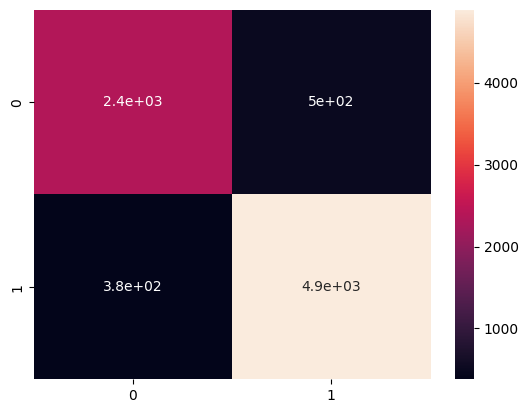

In [43]:
# Avaliando o modelo de Regressão Logística
show_metrics(y_test, y_lr_pred)

In [44]:
# Treinando o modelo para o pipeline de Naive Bayers
pipeline_nb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste para o pipeline de Naive Bayers
y_nb_pred = pipeline_nb.predict(X_test)

Acurácia:  0.8880009835259405
AUROC: 0.8737948941515694
F1-Score: 0.887595765310394
Matriz de confusão:


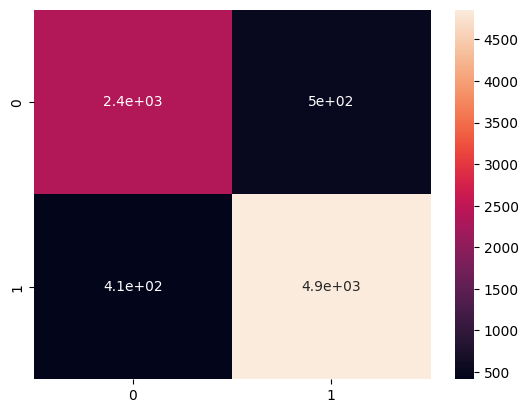

In [45]:
# Avaliando o modelo de Naive Bayers
show_metrics(y_test, y_nb_pred)